In [1]:
#   imports

from library import xy_from_dict_fn
from initialize import Experiment
from metrics import Bins, MutualInfoInterwell, MutualInfoPairwise
from figures import PlotLine, MatrixAnimated


In [2]:
#   global variable declaration

experiment_number = 20230404


In [3]:
#   initialize

experiment = Experiment(20230404)
well_gfp_bins = Bins(experiment.all_well_gfp_pop_dict)
experiment_gfp_mi = MutualInfoInterwell(experiment.timestep_list, 
                                        experiment.all_well_gfp_pop_dict, 
                                        well_gfp_bins.bin_edges)
pairwise_gfp_mi = MutualInfoPairwise(experiment.timestep_list, 
                                     experiment.all_well_gfp_pop_dict,
                                     experiment.well_id_list,
                                     well_gfp_bins.bin_edges)


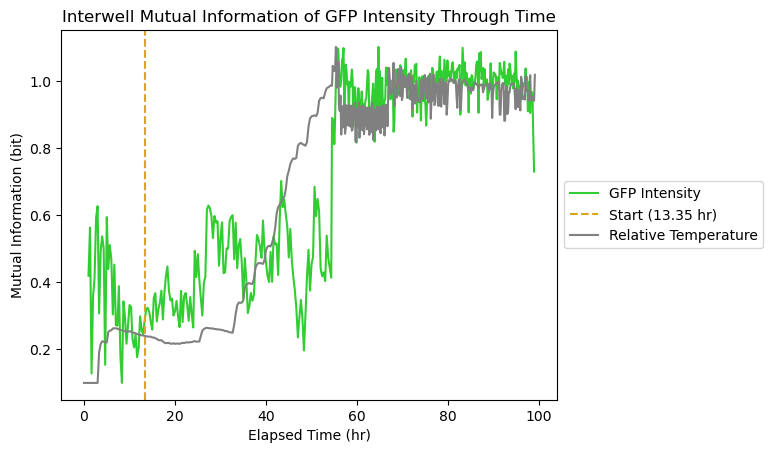

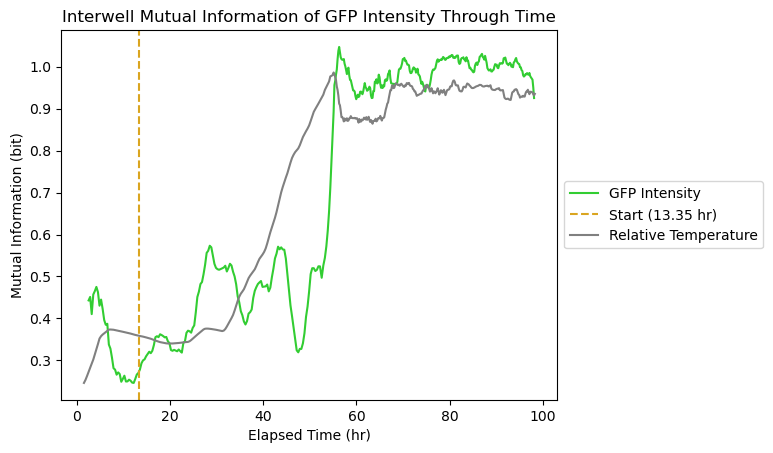

In [4]:
#    plot interwell mutual information of gfp through time

x, y = xy_from_dict_fn(experiment_gfp_mi.mi_dict)
x = [experiment.elapsed_dict[t] for t in x]
temp_x, temp_y = xy_from_dict_fn(experiment.temp_dict)
temp_x = [experiment.elapsed_dict[t] for t in temp_x]
start_x = experiment.elapsed_dict[experiment_gfp_mi.start_timestep]

for avg in (1, 10):
    plot = PlotLine([x], [y], avg=avg, label_list=['GFP Intensity'], 
                    color_list=['limegreen'], axv_x_list=[start_x], 
                    axv_label_list=[f'Start ({start_x} hr)'],
                    axv_color_list=['goldenrod'], temp_x=temp_x, temp_y=temp_y, 
                    temp_avg=avg, temp_label='Relative Temperature', 
                    title='Interwell Mutual Information of GFP Intensity Through '\
                    'Time', xlabel='Elapsed Time (hr)', 
                    ylabel='Mutual Information (bit)', 
                    save=f'mutual_info_figures/gfp_mi_interwell_avg_{avg}.png') 
    plot.show()


In [6]:
#    animate pairwise mutual information of gfp through time

ticklabels = pairwise_gfp_mi.well_id_list
ticks = [i for i in range(len(ticklabels))]
animatrix = MatrixAnimated(pairwise_gfp_mi.mi_matrix_dict, 
                           experiment.elapsed_dict, xticklabels=ticklabels, 
                           xticks=ticks, yticklabels=ticklabels, yticks=ticks, 
                           title='Pairwise Mutual Information by Well',
                           cbar_label = 'Mutual Information (bit)',
                           xlabel='Well Number', ylabel='Well Number', 
                           save=f'mutual_info_figures/gfp_mi_pairwise.mp4')
animatrix.show()
